In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
type(penguins)

pandas.core.frame.DataFrame

In [5]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

1. Wykresy statystyczne Seaborn

1.1. Wykresy rozkładu jednej zmiennej (distplot)

Wykres rozrzutu Seaborna, znany również jako jednowymiarowy wykres rozkładu, służy do wizualizacji rozkładu pojedynczej zmiennej. Aby utworzyć wykres, wystarczy wywołać funkcję distplot,  przekazując nazwę zmiennej, którą chcesz zwizualizować, na przykład "sepal_length" ze zbioru danych irysa.

Dodatkowo można określić opcje, takie jak włączenie wykresu „wygładzonego” i dostosowanie dopasowania danych do własnych preferencji.
__Distplot__ zapewnia kompleksową wizualną reprezentację dystrybucji danych, w tym tendencji centralnej, rozrzutu, skośności i wszelkich potencjalnych wartości odstających, umożliwiając głębsze zrozumienie danych.

<Axes: xlabel='bill_length_mm', ylabel='Density'>

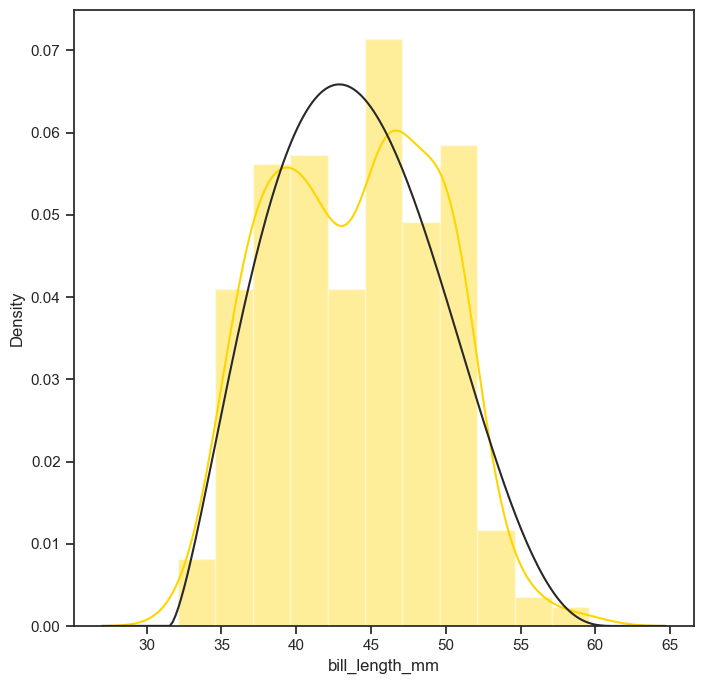

In [7]:
sns.set_theme(style='ticks', palette='hsv', rc={'figure.figsize':(8, 8)})
sns.distplot(penguins.bill_length_mm, rug=False, fit=stats.gausshyper)

1.2. Wykres wspólny (joinplot)

__Seaborn jointplot__ jest potężnym narzędziem do wizualizacji rozkładów dwuwymiarowych. Łączy wykres rozrzutu z histogramami zmiennych na każdej osi, zapewniając kompleksowy obraz relacji między dwiema zmiennymi.
Ten pojedynczy wykres może ujawnić ważne informacje o rozkładzie danych, w tym o obecności pozytywnych lub ujemnych relacji, rozkładzie każdej zmiennej i częstotliwości punktów danych.

Za pomocą jednego prostego polecenia wykres wspólny zapewnia wydajny i skuteczny sposób uzyskania wglądu w relacje między zmiennymi w danych.

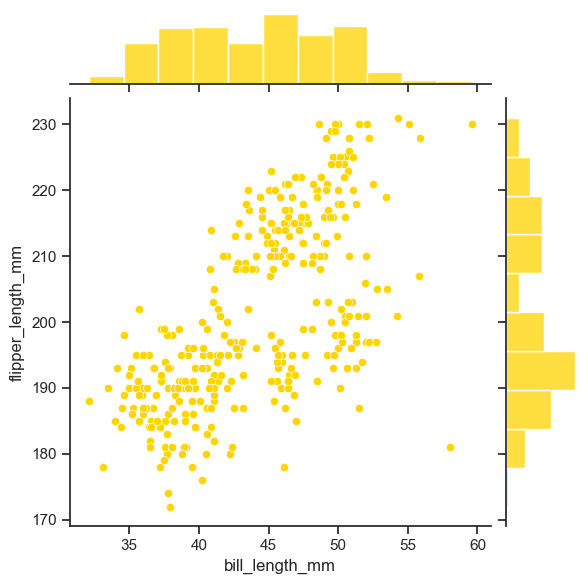

In [8]:
g = sns.jointplot(x='bill_length_mm', y='flipper_length_mm', data=penguins)

1.2.1. Wspólny wykres z sześciokątami (Hex Jointplot)

__Seaborn jointplot hex__ jest odmianą jointplot, która przedstawia rozkład dwuwymiarowy w innym formacie.
Zamiast używać kropek do reprezentowania poszczególnych punktów danych, wykres szesnastkowy używa sześciokątów do grupowania i wyświetlania gęstości punktów danych. Może to zapewnić wyraźniejszą reprezentację relacji między dwiema zmiennymi, szczególnie w przypadku dużej gęstości punktów danych.

Ponadto układ wykresu można łatwo dostosować do konkretnych potrzeb, co pozwala na większą kontrolę nad wyglądem i prezentacją danych.

Text(0.5, 0.98, 'Penguin sizes')

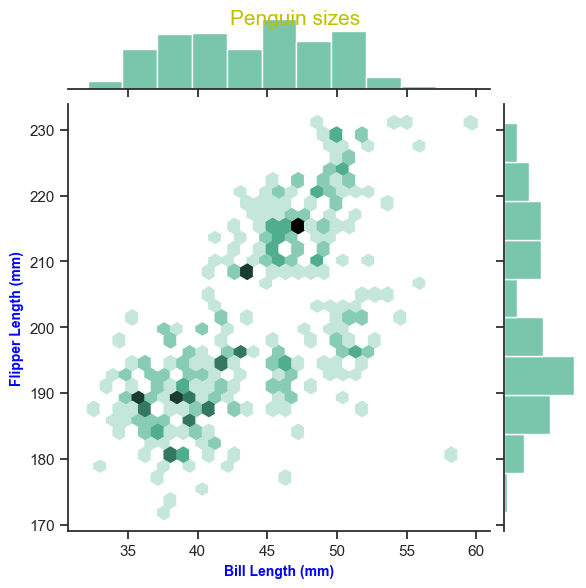

In [9]:
with sns.axes_style('ticks'):
    g = sns.jointplot(
        x='bill_length_mm',
        y='flipper_length_mm',
        data=penguins,
        kind='hex',
        color='#4CB391',
        gridsize=30
    )
g.set_axis_labels('Bill Length (mm)', 'Flipper Length (mm)', fontsize=10, fontweight='bold', color='b')
g.fig.suptitle('Penguin sizes', fontsize=15, color='y')

1.3. Wspólny wykres gęstości

__Seaborn density plot__ zapewnia alternatywną reprezentację rozkładu dwuwymiarowego poprzez zmianę wyświetlania punktów danych na oszacowanie gęstości jądra (KDE).
Zamiast pojedynczych punktów danych wykres pokazuje szacowaną gęstość danych. Może to zapewnić płynniejszą reprezentację rozkładu danych i ujawnić podstawowe wzorce, które mogą nie być natychmiast widoczne na wykresie punktowym.

Ponadto histogramy na osiach są również przekształcane w wykresy gęstości, zapewniając bardziej kompleksowy obraz rozkładu każdej zmiennej.

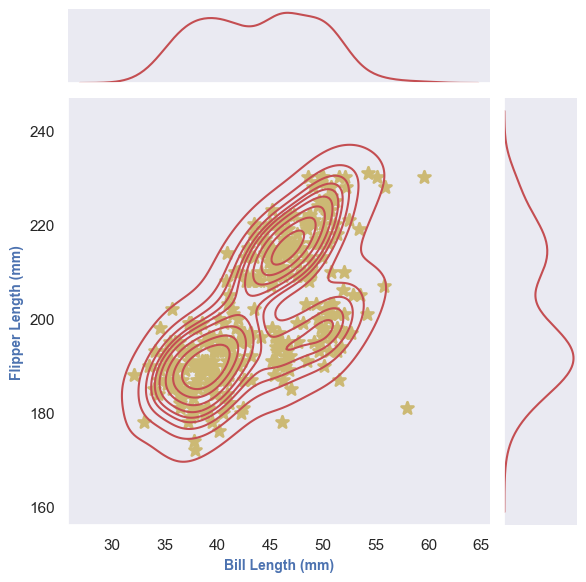

In [10]:
sns.set_theme(style="dark")
g = sns.jointplot(
    x='bill_length_mm',
    y='flipper_length_mm',
    data=penguins,
    kind='kde',
    color='r'
)
g.plot_joint(plt.scatter, c='y', s=80, linewidth=2, marker='*')
g.set_axis_labels('Bill Length (mm)', 'Flipper Length (mm)', fontsize=10, fontweight='bold', color='b')

1.4. Wykres pary — poręczny wykres dla kilku zmiennych

Seaborn pairplot zapewnia kompleksową wizualizację relacji między wszystkimi zmiennymi w zestawie danych.
Wywołując funkcję pairplot i przekazując zestaw danych, Seaborn automatycznie tworzy wykresy rozrzutu i histogramy dla wszystkich kombinacji zmiennych, wyświetlając ich relacje na jednym wykresie.

Ten wykres jest potężnym narzędziem do uzyskania ogólnego zrozumienia rozkładu zmiennych w danych i może szybko ujawnić wszelkie znaczące relacje lub wzorce. Przy minimalnym wkładzie ze strony użytkownika funkcja wykresu par może generować bardzo pouczający wykres, który jest cenny do analizy danych eksploracyjnych.

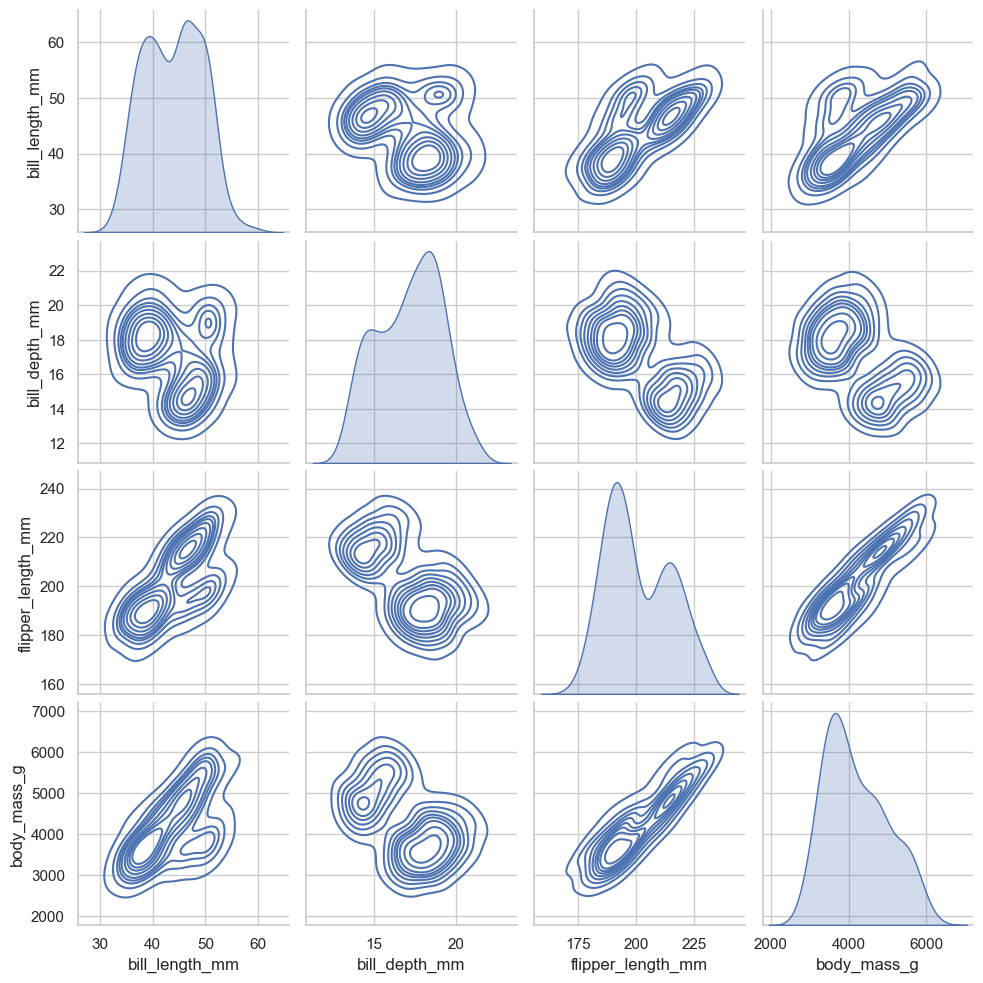

In [11]:
sns.set_theme(style="whitegrid")
sns.pairplot(penguins, kind='kde')

2. Wizualizacje relacji

In [12]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [13]:
type(taxis)

pandas.core.frame.DataFrame

In [14]:
taxis.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [15]:
taxis.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

2.1. Wspólny wykres — regresja liniowa

Wspólny wykres z regresją liniową w Seaborn jest potężnym narzędziem do badania relacji między dwiema zmiennymi.
Przekazując argument "reg" do parametru kind, wykres tworzy wykres punktowy i dopasowuje linię regresji liniowej do danych, pokazując siłę relacji między dwiema zmiennymi.

Ponadto wykres zawiera również histogramy na osiach, aby pokazać rozkład każdej zmiennej, oraz wykres gęstości zapewniający wizualną reprezentację gęstości punktów danych. Ta kombinacja cech sprawia, że wykres wspólny z regresją liniową jest niezwykle przydatnym narzędziem do zrozumienia relacji w danych i badania potencjalnych trendów lub wzorców.

Text(0.5, 0.98, 'Taxi costs')

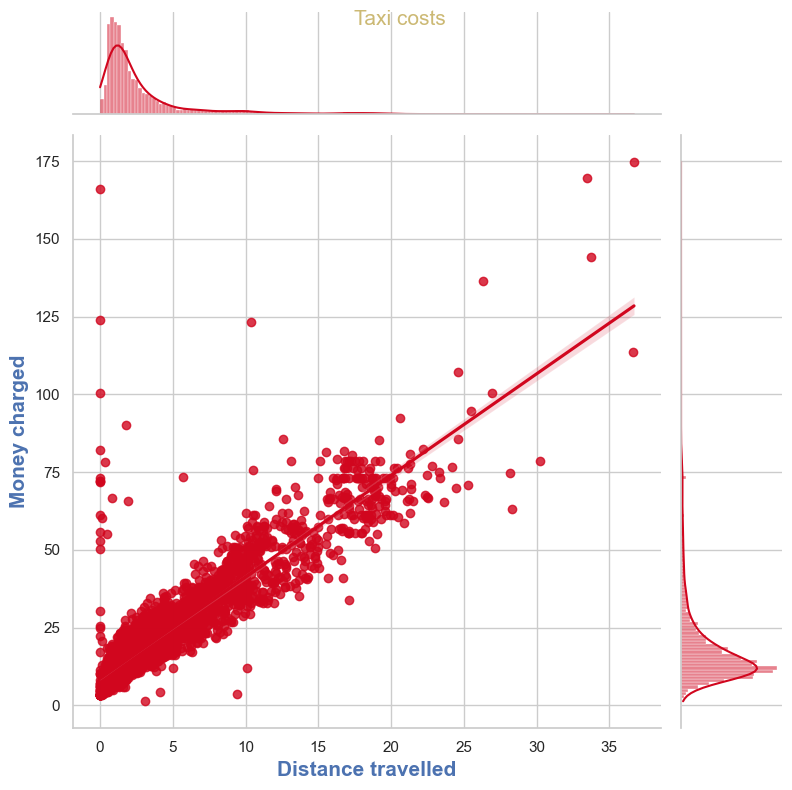

In [16]:
g = sns.jointplot(
    x='distance',
    y='total',
    data=taxis,
    kind='reg',
    color="#d1061e",
    height=8
)
g.set_axis_labels('Distance travelled', 'Money charged', fontsize=15, fontweight='bold', color='b')
g.fig.suptitle('Taxi costs', fontsize=15, color='y')

2.2. Lmplot - Regresja liniowa

The lmplot w bibliotece Seaborn jest potężnym narzędziem do wizualizacji relacji między dwiema zmiennymi na wykresie punktowym z dopasowaną linią regresji liniowej

W przeciwieństwie do wspólnego wykresu, lmplot pokazuje tylko wykres rozproszenia i linię regresji, co pozwala na wyraźniejsze skupienie się na relacji między zmiennymi.

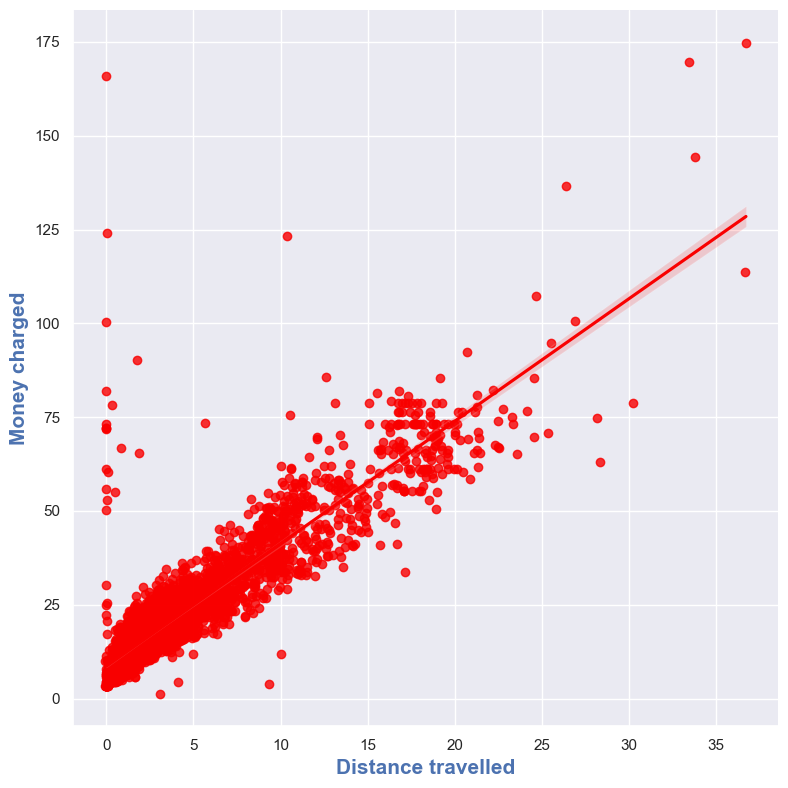

In [17]:
sns.set_theme(style="darkgrid", palette="nipy_spectral_r")
g = sns.lmplot(x='distance', y='total', data=taxis, x_jitter=.05, height=8)
g.set_axis_labels('Distance travelled', 'Money charged', fontsize=15, fontweight='bold', color='b')

2.2.1. Wykres lmplot z zakresami danych

Ten wykres nie tylko wyświetla wykres rozrzutu z dopasowaną linią regresji liniowej, ale także dodaje górne i dolne granice do każdego punktu danych, zapewniając wizualną reprezentację niepewności danych.

Wizualizując zakresy danych, można lepiej zrozumieć relacje między zmiennymi i podejmować świadome decyzje dotyczące danych i analizy.

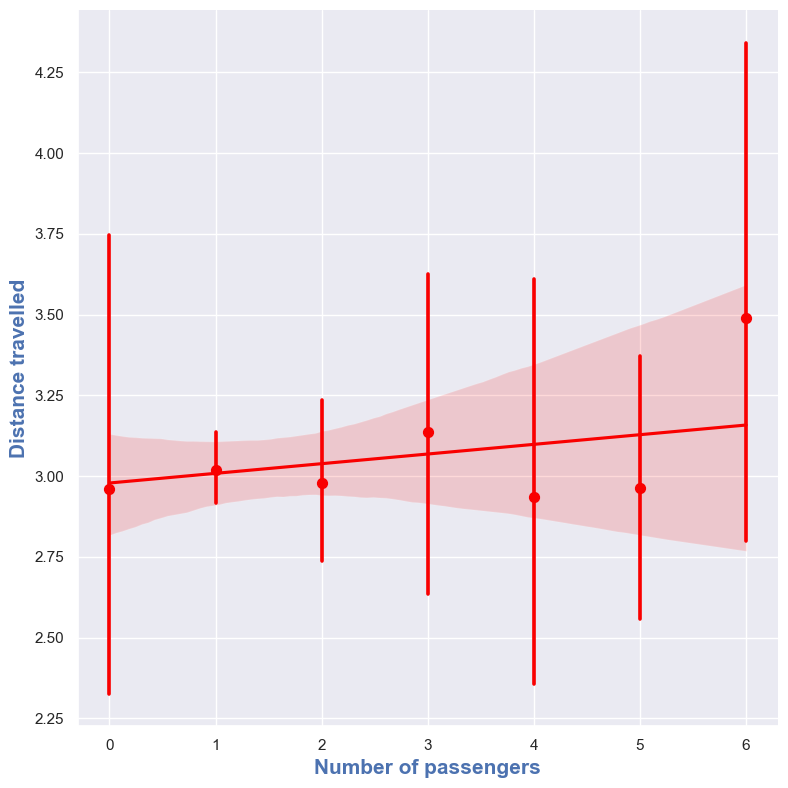

In [18]:
g = sns.lmplot(x='passengers', y='distance', data=taxis, x_estimator=np.mean, height=8)
g.set_axis_labels('Number of passengers', 'Distance travelled', fontsize=15, fontweight='bold', color='b')

2.3. Query — filtr + regresja

Możemy filtrować dane ze zbioru danych, aby wykreślić je na wykresie, tworząc rodzaj zapytania.

Dostosowanie parametrów w seaborn pozwala dostosować wygląd wykresów, w tym linii regresji. Dostosowując parametry, można precyzyjnie dostosować wizualizację danych, ułatwiając zrozumienie relacji między zmiennymi i identyfikowanie trendów lub wzorców w danych.

Niezależnie od tego, czy chcesz zmienić kolor linii, styl znacznika czy etykiety osi, możliwość dostosowania parametrów zapewnia elastyczność prezentacji danych w sposób, który najlepiej wspiera analizę.

In [19]:
anagrams = sns.load_dataset('anagrams')

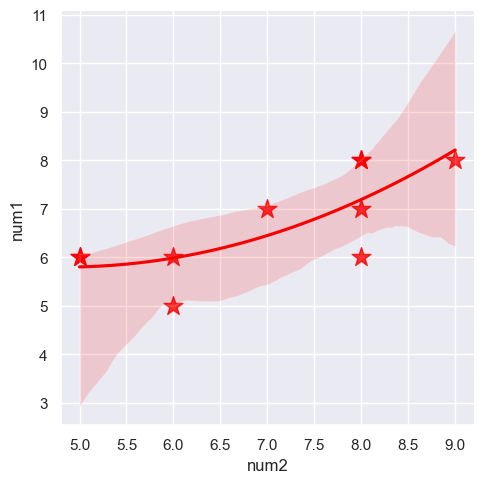

In [20]:
sns.lmplot(
    x='num2',
    y='num1',
    data=anagrams.query("attnr=='focused'"),
    order=2,
    ci=95,
    scatter_kws={'s': 200},
    markers="*"
)

2.4. Wykrywanie wartości odstających

Wykrywanie wartości odstających ma kluczowe znaczenie, ponieważ pomaga w identyfikacji punktów danych, które znacznie odbiegają od normalnego wzorca danych. Identyfikując te wartości odstające, można uzyskać głębsze zrozumienie rozkładu danych i podejmować świadome decyzje w oparciu o spostrzeżenia.

W Seaborn wizualizacja wartości odstających jest niezbędnym krokiem w eksploracji zbioru danych. Można to osiągnąć za pomocą różnych technik, takich jak wykresy punktowe, wykresy pudełkowe i inne.

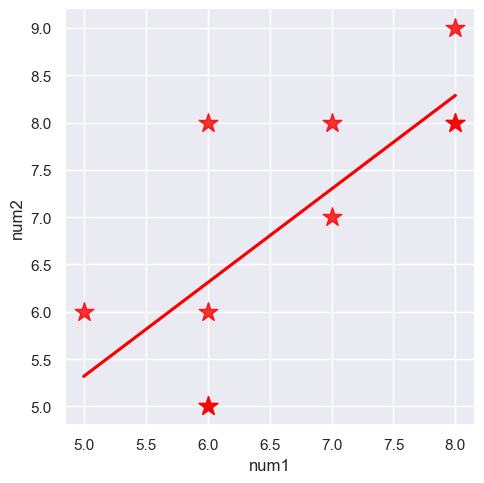

In [21]:
sns.lmplot(
    x='num1',
    y='num2',
    data=anagrams.query("attnr=='focused'"),
    ci=None,
    scatter_kws={'s': 200},
    markers="*"
)

2.5. Zależność nieliniowa

Możemy wizualizować zależność nieliniową, w której zmiana jednej zmiennej nie jest proporcjonalnie powiązana ze zmianą innej zmiennej.

2.5.1. Dostosowywanie wykresu

Znaczenie dostosowywania wykresów w seaborn polega na możliwości wizualnego podkreślenia różnic między zmiennymi.

2.5.2. Dostosowanie parametrów

Dostosowując parametry, możemy tworzyć wykresy, które w jasny i skuteczny sposób komunikują informacje, które chcemy przekazać.

2.5.3. Dostosowywanie obszaru podziału

Mamy możliwość podzielenia obszaru działki na wiele sekcji. Cały obszar wykresu jest określany jako obszar wykresu, a powyżej mamy pojedynczy wykres w obszarze wykresu, podczas gdy poniżej mamy dwa wykresy w obszarze wykresu. Na przykład zbadamy zmienną "tip" na osi y. Używamy tej samej zmiennej dla dwóch wykresów i dokonujemy zmiany w parametrze "col", dzieląc wykresy na "total_bill" odpowiadające porze lunchu i kolacji.

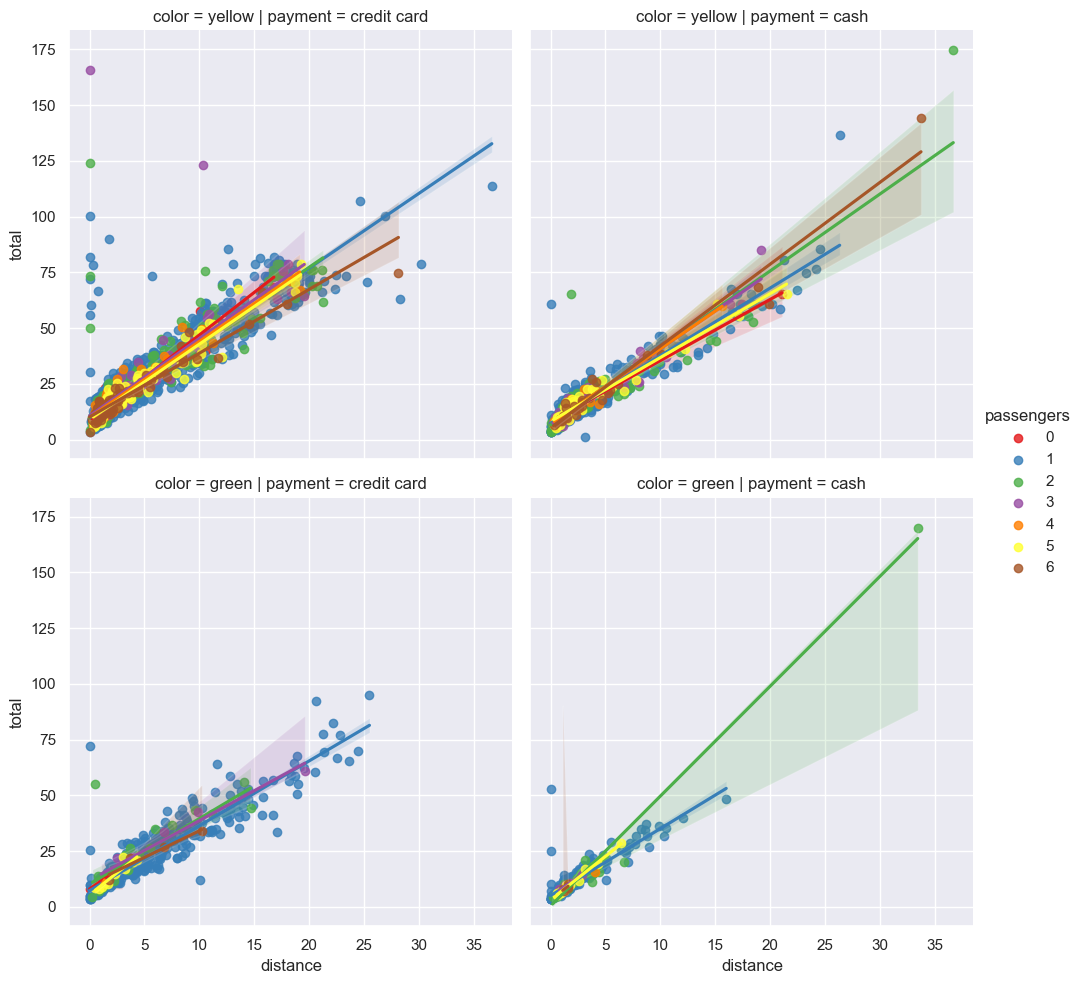

In [22]:
sns.lmplot(
    x='distance',
    y='total',
    hue='passengers',
    col='payment',
    row='color',
    data=taxis,
    palette='Set1'
)

2.5.4. Zmiana obszaru podziału poprzez zmianę parametru

Możemy dalej podzielić obszar wykresu, zmieniając parametr col na day, tworząc w ten sposób różne bloki danych dla każdego dnia tygodnia.

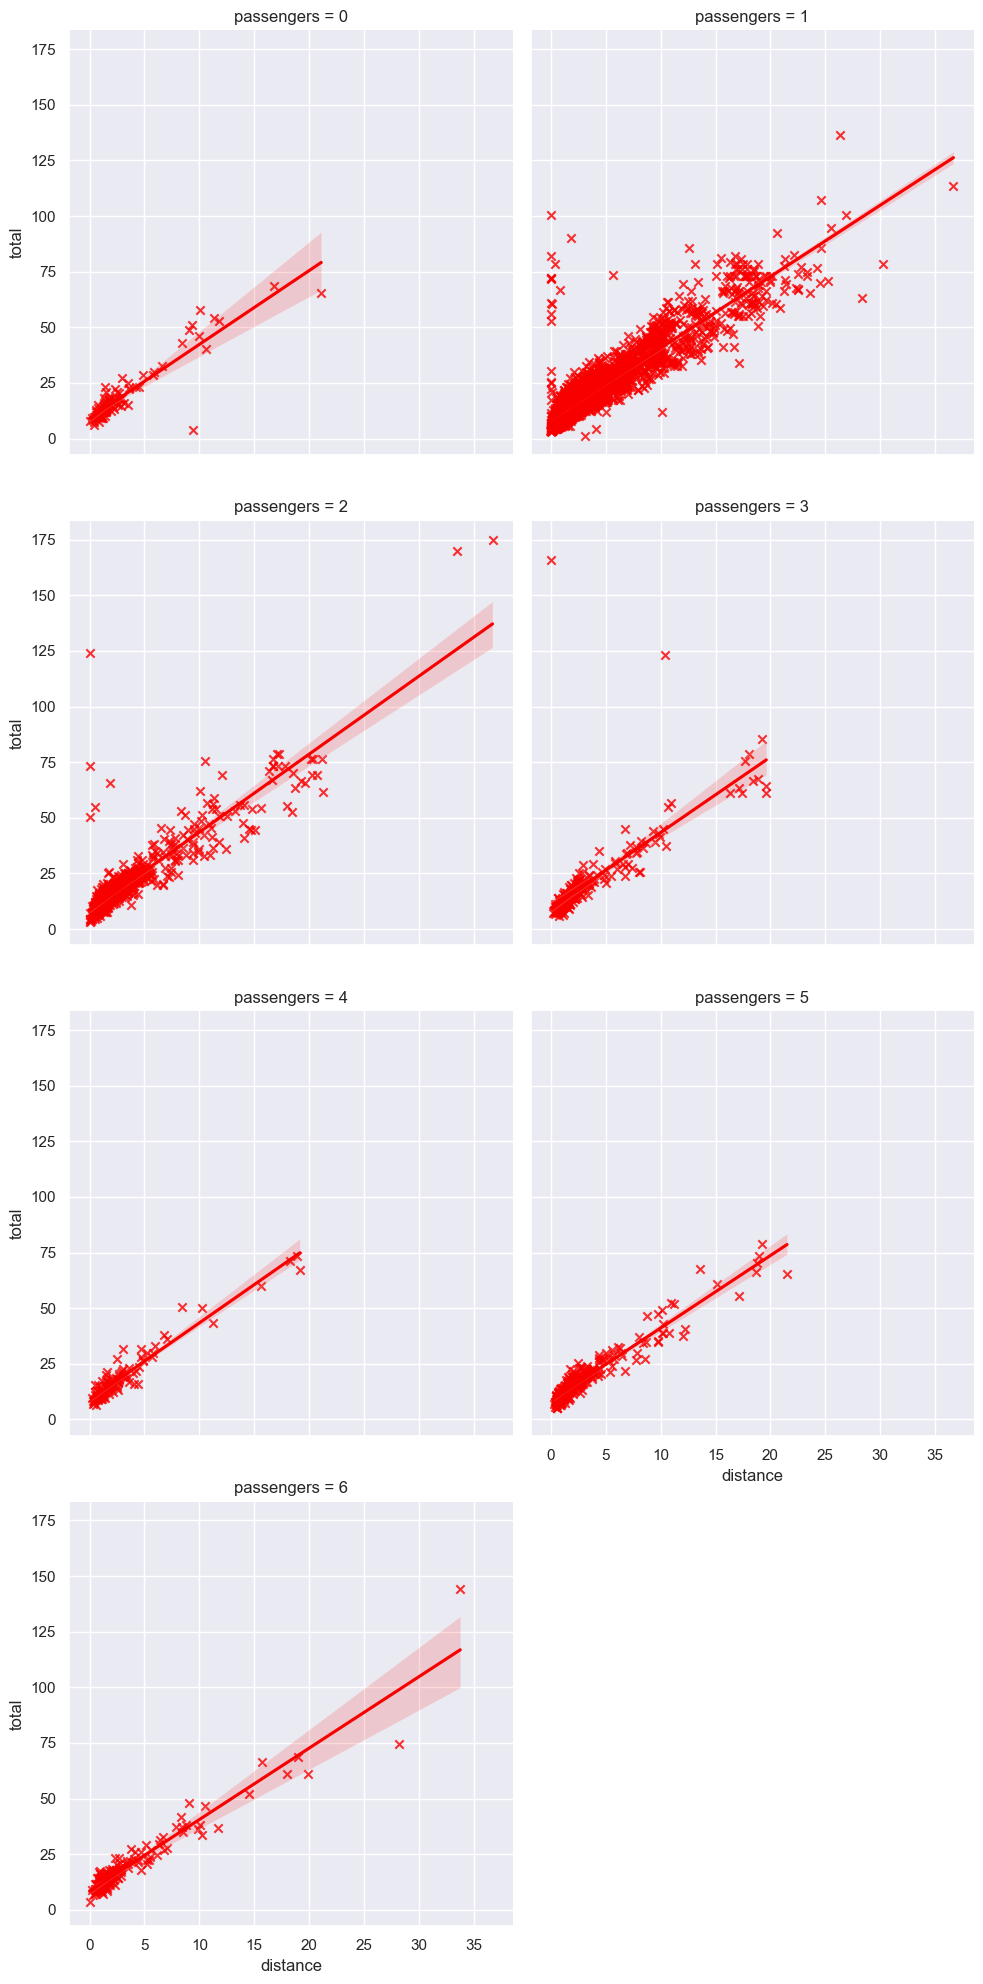

In [23]:
sns.lmplot(
    x='distance',
    y='total',
    col='passengers',
    col_wrap=2,
    data=taxis,
    markers=['x'],
    palette='Set1'
)

2.5.5. Podzielony obszar poziomy

Zamiast wielu wykresów ułożonych pionowo, zmieniliśmy teraz orientację, aby mieć je obok siebie.
Dni tygodnia są teraz w jednym rzędzie, zapewniając poziomą reprezentację wizualną ze zmianą parametrów z col_wrap.

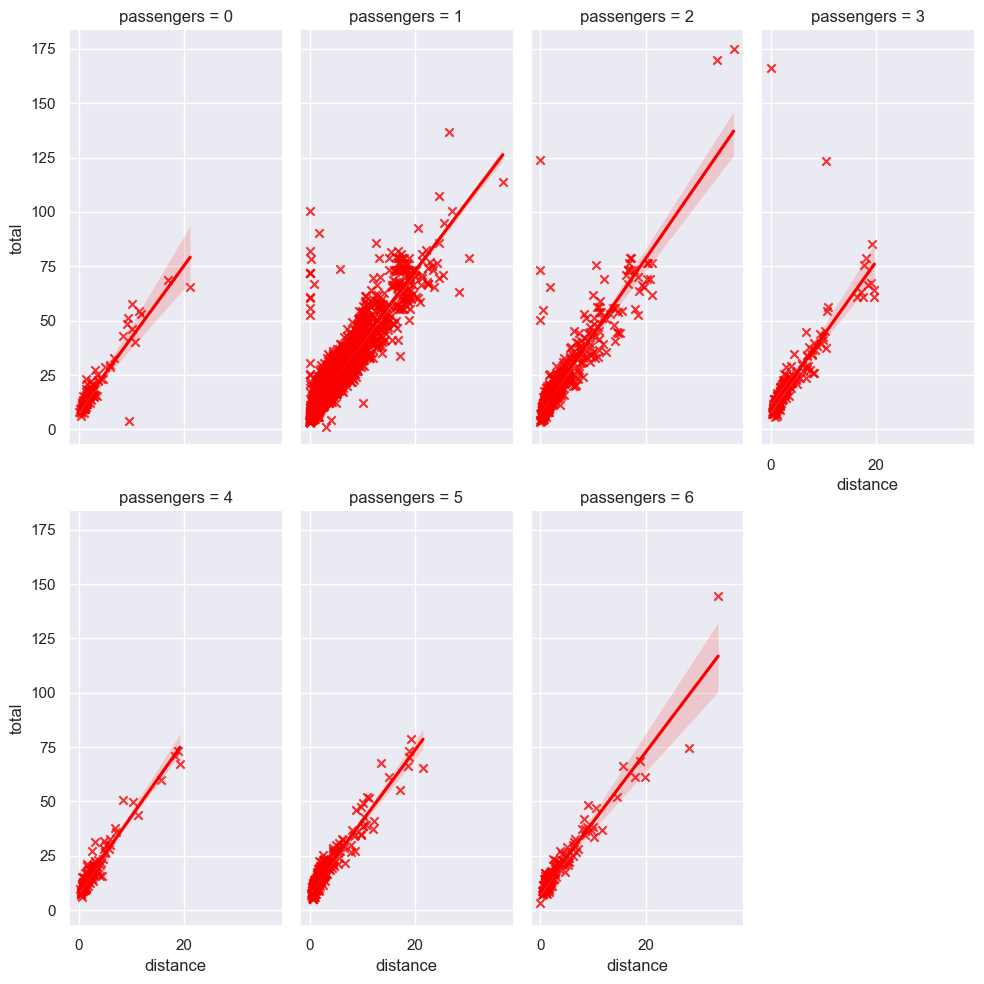

In [24]:
sns.lmplot(
    x='distance',
    y='total',
    col='passengers',
    col_wrap=4,
    data=taxis,
    markers=['x'],
    palette='Set1',
    aspect=.5
)

3. Praca ze zmiennymi kategorycznymi

Reprezentacja zmiennych kategorii lub zmiennych zawierających wartości ciągów jest ważnym aspektem wizualizacji danych.
Do tej pory badaliśmy wykresy dla zmiennych liczbowych, ale równie ważna jest wizualna analiza relacji między danymi jakościowymi a innymi zmiennymi w naszym zbiorze danych.

3.1. Wykres pasków (Stripplot)

Teraz staramy się zidentyfikować całkowity rachunek za dzień tygodnia. Ponieważ dzień tygodnia jest zmienną kategoryczną, musi być reprezentowany inaczej.

<Axes: xlabel='passengers', ylabel='distance'>

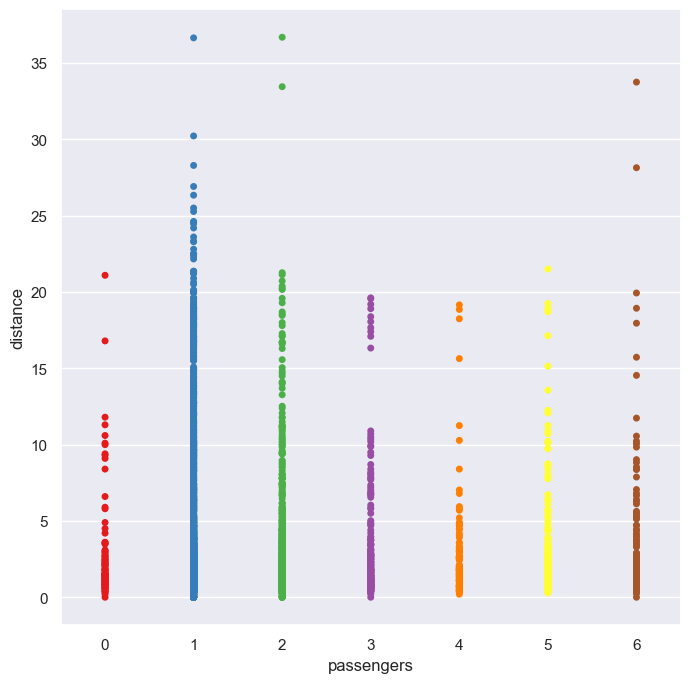

In [25]:
sns.stripplot(
    x='passengers',
    y='distance',
    data=taxis,
    palette='Set1',
    jitter=False
)

3.2. Wykres roju

__Wykres roju Seaborn__ jest podobny do poprzedniego wykresu, ale przedstawia punkty danych w sposób, który pozwala uniknąć nakładania się.

<Axes: xlabel='passengers', ylabel='distance'>

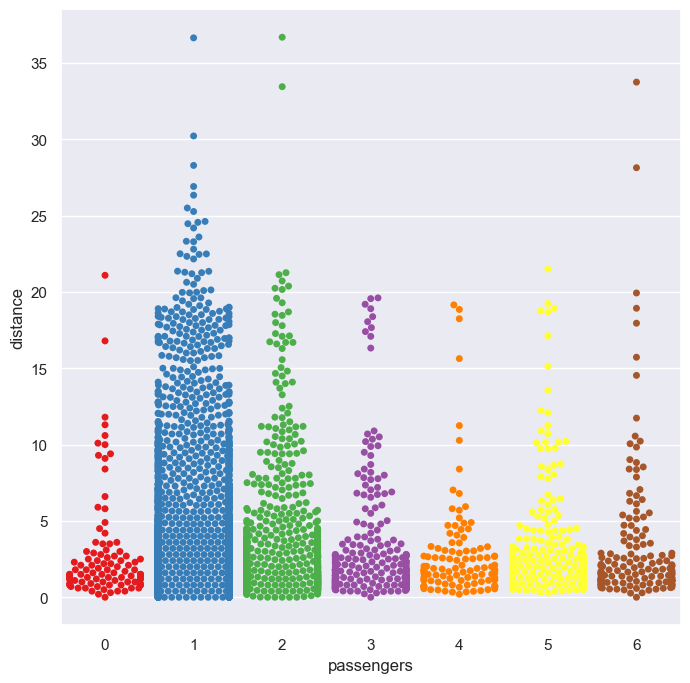

In [26]:
sns.swarmplot(
    x='passengers',
    y='distance',
    data=taxis,
    palette='Set1'
)

3.3. Wykres pudełkowy (boxplot)
__Seaborn boxplot__ jest popularnym wykresem w statystyce, gdy mamy do czynienia ze zmiennymi kategorycznymi. Wyświetla wartości odstające lub wartości, które odbiegają od typowego wzorca reprezentacji danych.

<Axes: xlabel='passengers', ylabel='fare'>

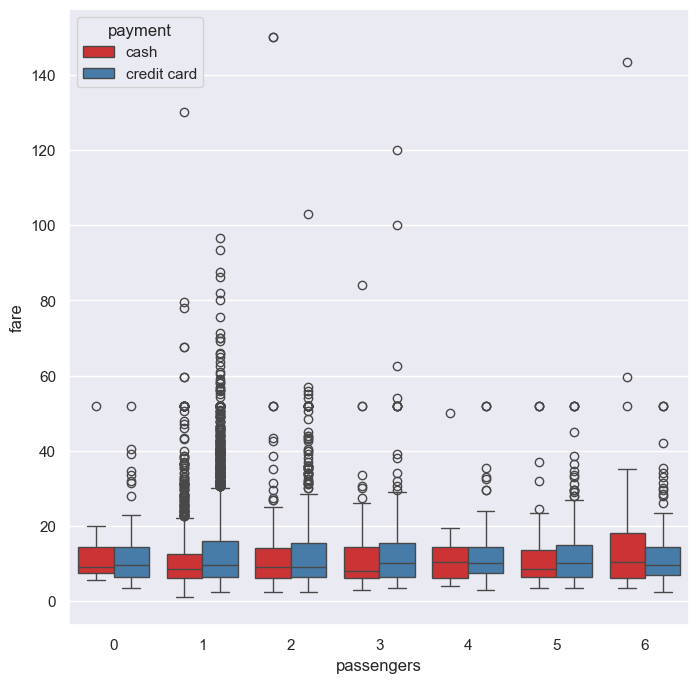

In [32]:
sns.boxplot(
    x='passengers',
    y='fare',
    hue='payment',
    data=taxis,
    palette='Set1'
)

3.3.1. Poziomy wykres pudełkowy

<Axes: >

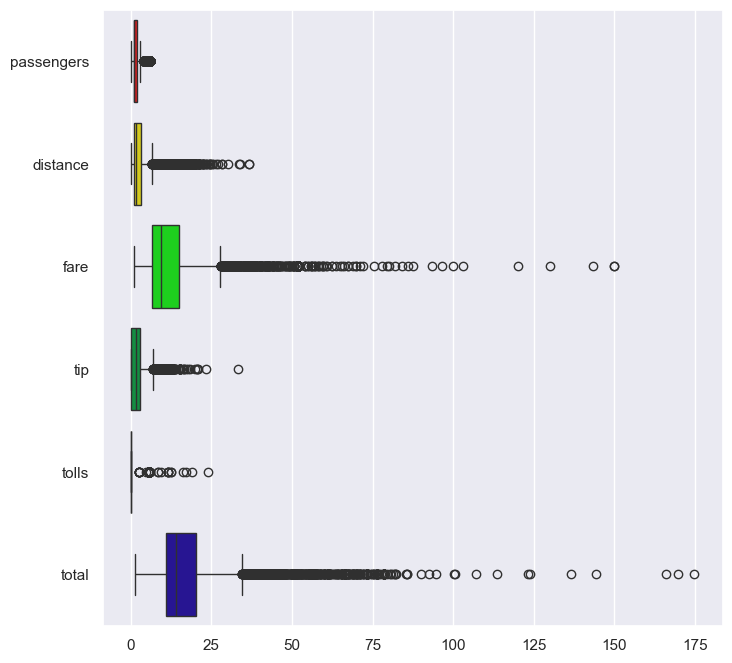

In [33]:
sns.boxplot(taxis, orient='h')

3.4. Wykres wiolinowy
__Wykres skrzypiec__ jest użytecznym wykresem w __seaborn__ do wizualizacji rozkładu zmiennej.
Jest to kombinacja __wykresu skrzynkowego__ i __wykresu gęstości__ i pokazuje gęstość danych wraz z zakresem i wartościami mediany.

Ten typ wykresu jest szczególnie przydatny do zrozumienia rozkładu danych multimodalnych lub do porównania rozkładów różnych grup lub kategorii.
Korzystając z wykresu skrzypcowego, możemy uzyskać głębszy wgląd w rozkład zmiennej i podejmować bardziej świadome decyzje na podstawie naszej analizy.

Możemy dokonać pewnych dostosowań do wykresu skrzypiec, aby __zwęzić kształt skrzypiec__.

<Axes: xlabel='distance', ylabel='color'>

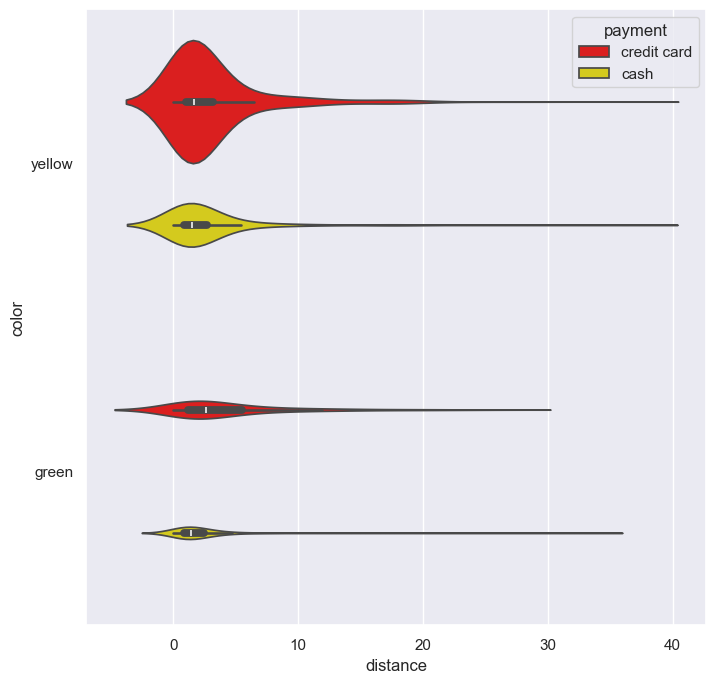

In [41]:
sns.violinplot(
    x='distance', 
    y='color',
    hue='payment',
    data=taxis,
    bw=.5,
    scale='count',
    scale_hue=True
)

3.4.1. Wykres wiolinowy pionowy

<Axes: xlabel='color', ylabel='distance'>

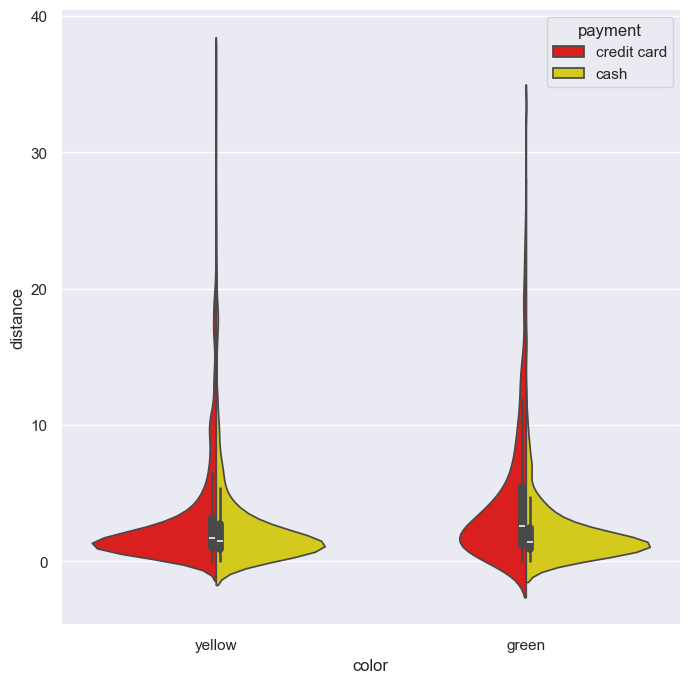

In [42]:
sns.violinplot(
    x='color', 
    y='distance',
    hue='payment',
    data=taxis,
    split=True
)

3.5. Wykres słupkowy (barplot)

Innym wykresem powszechnie używanym do reprezentowania zmiennych kategorii jest wykres słupkowy.
Wykresy słupkowe są często używanymi wykresami dla zmiennych jakościowych i zapewniają wizualną reprezentację danych na wysokości słupków.

Pomagają szybko porównywać różne kategorie i identyfikować trendy i wzorce. Ponadto wykresy słupowe umożliwiają łatwe dostosowywanie i mogą być dostosowane do lepszego dopasowania do analizowanych danych.

<Axes: xlabel='passengers', ylabel='distance'>

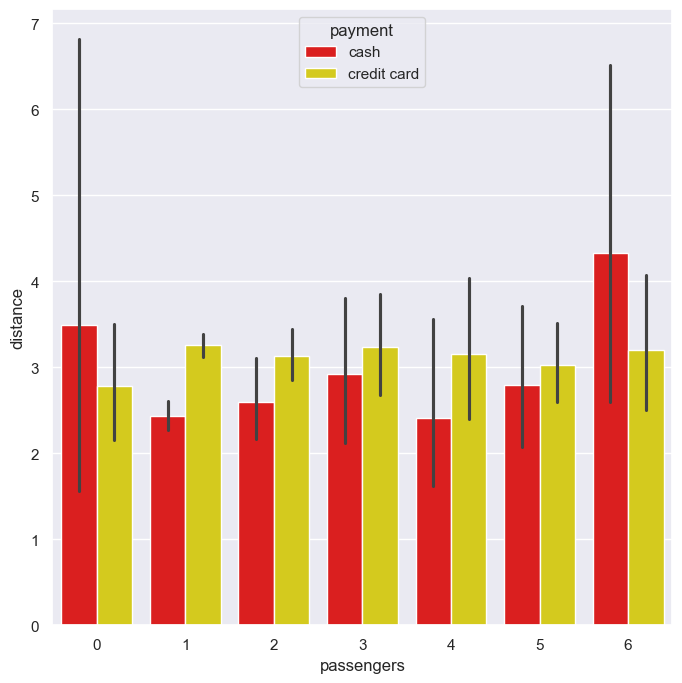

In [43]:
sns.barplot(
    x='passengers',
    y='distance',
    hue='payment',
    data=taxis
)

3.6. Wykres licznika (countplot)

Wykres licznika jest wykresem używanym do wyświetlania liczby elementów dla każdej kategorii w zmiennej kategorii. W takim przypadku można go użyć do pokazania liczby elementów dla każdego dnia tygodnia.

<Axes: xlabel='passengers', ylabel='count'>

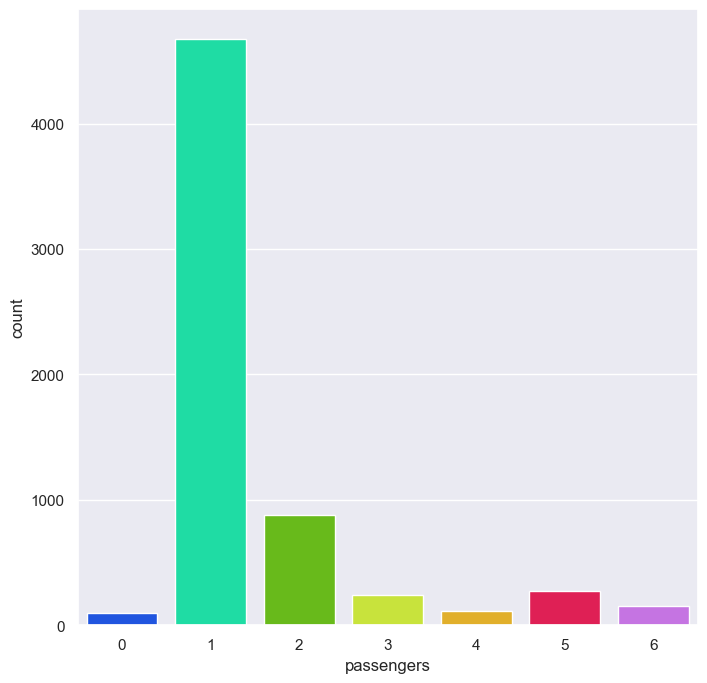

In [45]:
sns.countplot(
    x='passengers',
    data=taxis,
    palette='gist_ncar'
)

Możemy wprowadzić zmiany w wykresie liczenia, aby wyświetlić liczbę osób na płeć na dzień tygodnia w orientacji poziomej.

<Axes: xlabel='count', ylabel='passengers'>

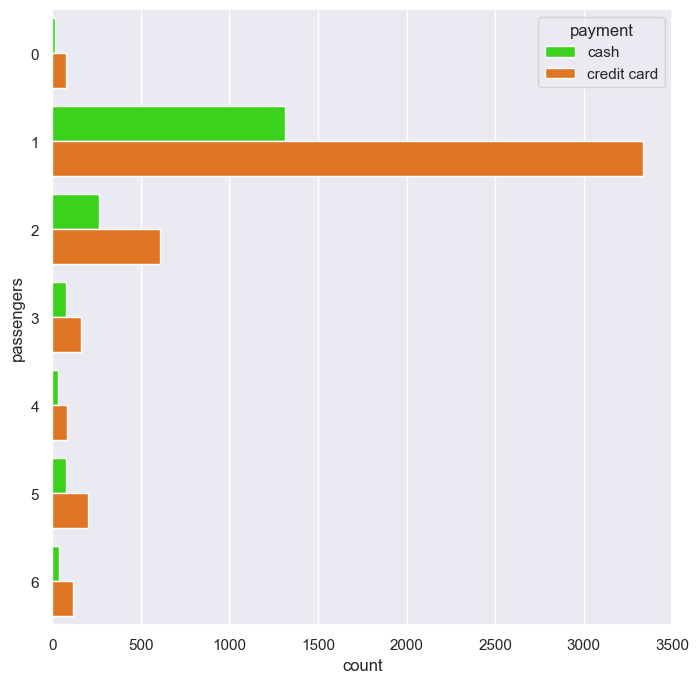

In [46]:
sns.countplot(
    y='passengers',
    hue='payment',
    data=taxis,
    palette='gist_ncar'
)

3.6.1 Ciągły wykres licznika

Tutaj widzimy przykład liczenia za pomocą ciągłych słupków, które są podzielone na sekcje dla każdego dnia tygodnia.

<Axes: xlabel='count', ylabel='passengers'>

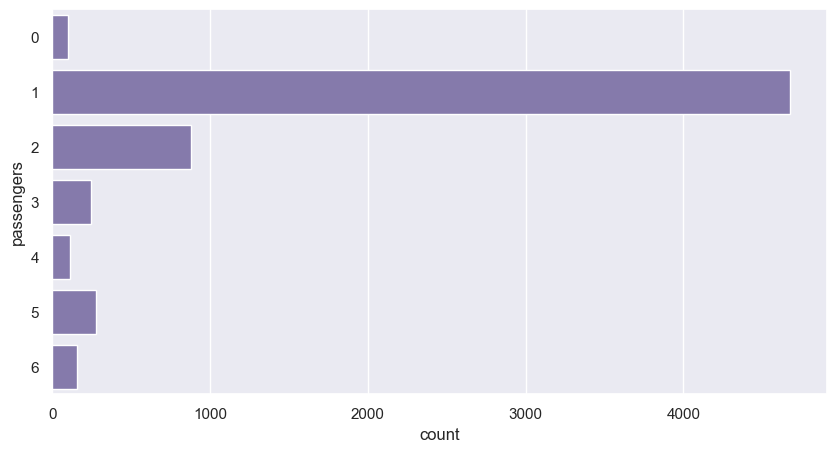

In [47]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    y='passengers',
    data=taxis,
    color='m'
)

3.7. Wykres punktowy

Wykres punktowy to inny typ wykresu, który można wykorzystać do przedstawienia zmiennych jakościowych poprzez pokazanie związku między płcią a całkowitą liczbą.

<Axes: xlabel='passengers', ylabel='distance'>

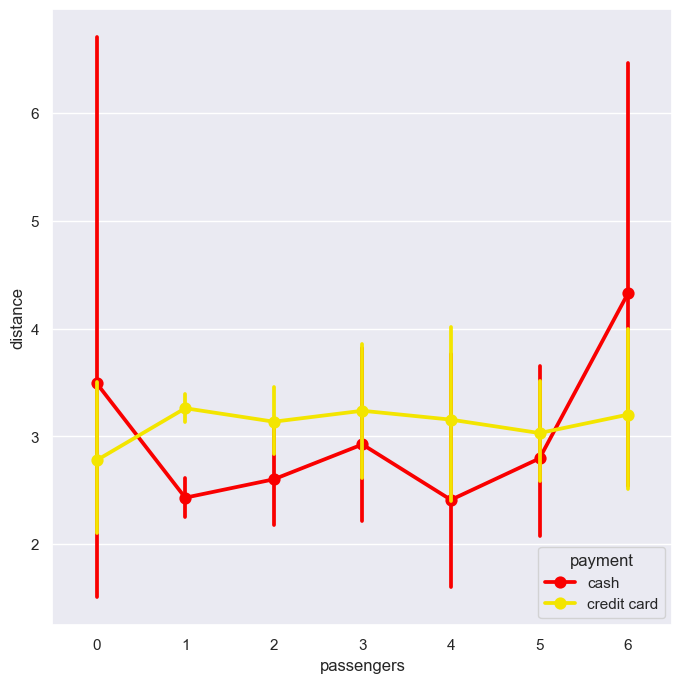

In [50]:
sns.pointplot(
    x='passengers',
    y='distance',
    hue='payment',
    data=taxis
)

3.8. Wykres czynnikowy

Wykres czynnikowy jest wariantem wykresu punktowego, który oferuje opcje dostosowywania do reprezentowania danych jakościowych.

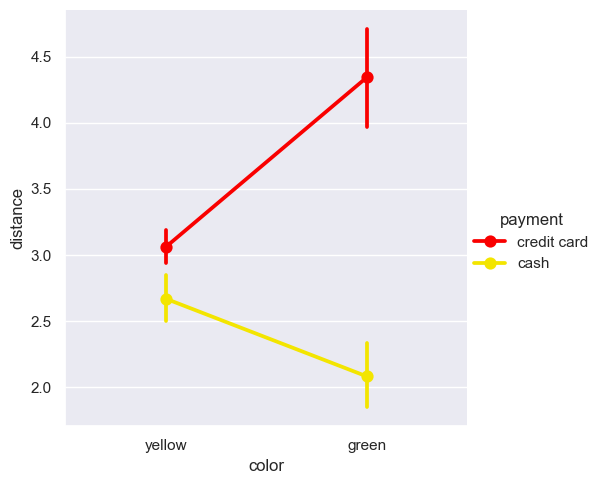

In [54]:
sns.catplot(
    x='color',
    y='distance',
    hue='payment',
    data=taxis,
    kind='point'
)